In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('./datasets/cleaned-migration.csv')
df

,country,year,migration_no,iso_alpha
0,Ireland,1864,121,IRL
1,Ireland,1865,82,IRL
2,Ireland,1866,49,IRL
3,Ireland,1867,25,IRL
4,Ireland,1868,5,IRL
...,...,...,...,...
8100,Colombia,2016,438,COL
8101,Russian Federation,2016,461,RUS
8102,Brazil,2016,574,BRA
8103,France,2016,672,FRA


In [3]:
df = df.groupby(['country','year']).agg({'migration_no':'sum'}).reset_index()
df = df.sort_values(by=['migration_no'], ascending = False)
df

,country,year,migration_no
7666,United Kingdom,1968,80205
7667,United Kingdom,1969,76336
7664,United Kingdom,1966,75514
7662,United Kingdom,1964,74754
7663,United Kingdom,1965,74749
...,...,...,...
4109,Libya,2015,5
4111,Liechtenstein,1981,5
4112,Liechtenstein,1986,5
4113,Liechtenstein,1987,5


<AxesSubplot:>

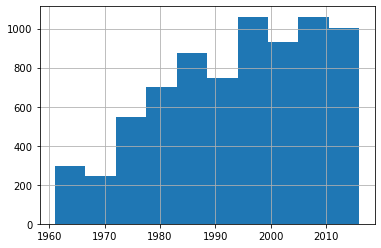

In [34]:
df["year"][df.year > 1960].hist()

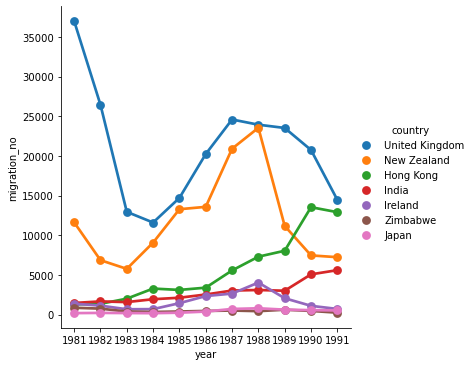

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
df_limit = df.loc[df['country'].isin(['Zimbabwe','Hong Kong','Japan', 'India', 'China', 'United Kingdom', "Ireland", "New Zealand"])]
year = (df_limit['year'] > 1980) & (df_limit['year'] <= 1991)
df_limit = df_limit.loc[year]


sns.catplot(x="year", y="migration_no", hue="country", kind="point", data=df_limit)
plt.show()